In [26]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import pairwise_distances
import seaborn as sns
import pandas as pd

In [27]:
data = np.load("../../Data/Spiral/rotated.npy")

random_mat = np.random.normal(0, 1, (10, 10))

# random_mat = np.random.rand(10, 10)

In [28]:
data.shape

(6, 10, 1000)

In [29]:
random_mat

array([[-0.02661739, -1.16316505,  1.27949165, -1.12110968,  1.76433948,
        -0.22318699,  0.10250154,  0.53571933, -0.07729708,  0.2449776 ],
       [ 0.2046977 ,  0.03825342,  0.20423298,  0.11052724,  0.69353334,
         0.17862671, -0.01458991,  1.28837811,  0.23797236,  0.86041146],
       [ 0.12502822, -1.88617323,  0.38073301, -1.22267475,  0.71659985,
         0.98505347,  1.07711956,  0.10277659,  1.53596707,  1.61667744],
       [ 0.43844249, -0.00944399, -2.17009706, -0.11546101,  1.0491206 ,
         1.31126342, -0.61133997,  0.18930113, -1.11840765,  0.30814768],
       [-1.24428575, -0.88672835,  0.20619073,  0.58166322,  0.11331067,
        -1.42644502,  0.55511729, -0.33556622, -0.27239987, -0.29017287],
       [-1.37444534, -2.11549868,  1.62237358,  0.6820257 ,  1.53577394,
        -3.57595999,  0.66311054, -0.39920278,  0.25859449, -0.15730328],
       [-1.29368216,  1.68295036, -1.52725928,  1.50369652, -0.68958505,
        -0.67511655, -0.86697838, -0.1413565 

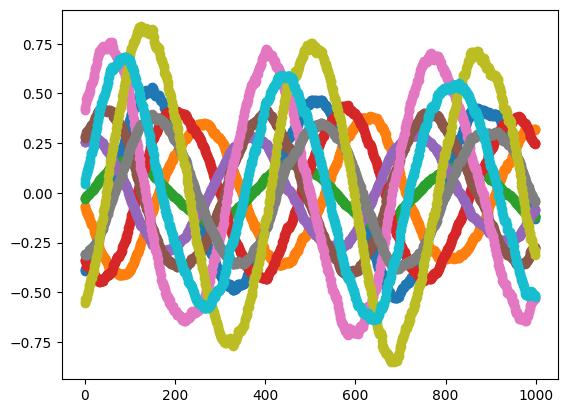

In [30]:
for i in range(10):
    plt.plot(np.arange(1000), data[0, i, :], 'o')

In [31]:
shape_0 = data.shape[0]
shape_1 = data.shape[1]
shape_2 = data.shape[2]

data_transform = np.zeros((shape_0, shape_1, shape_2))
data_transform.shape

(6, 10, 1000)

In [32]:
for i in range(data.shape[0]):
    data_transform[i, :, :] = random_mat @ data[i, :, :]

data_transform.shape

(6, 10, 1000)

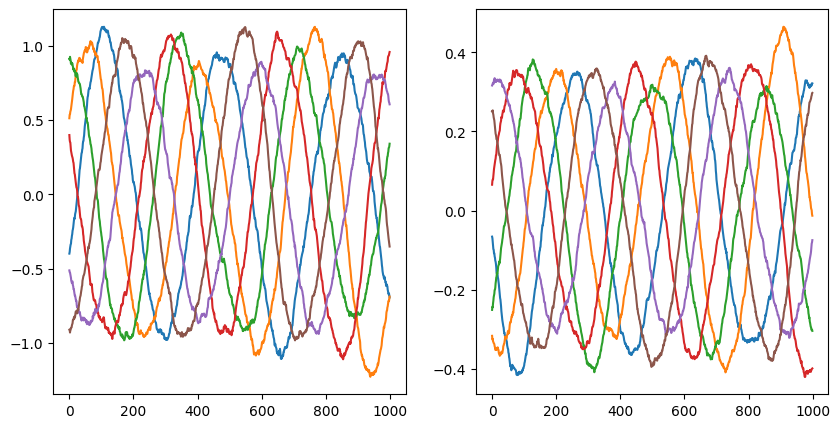

In [33]:
fig, ax = plt.subplots(1, 2, figsize=(10, 5))
for i in range(6):
    ax[0].plot(np.arange(1000), data_transform[i, 1, :])
    
for i in range(6):
    ax[1].plot(np.arange(1000), data[i, 1, :])

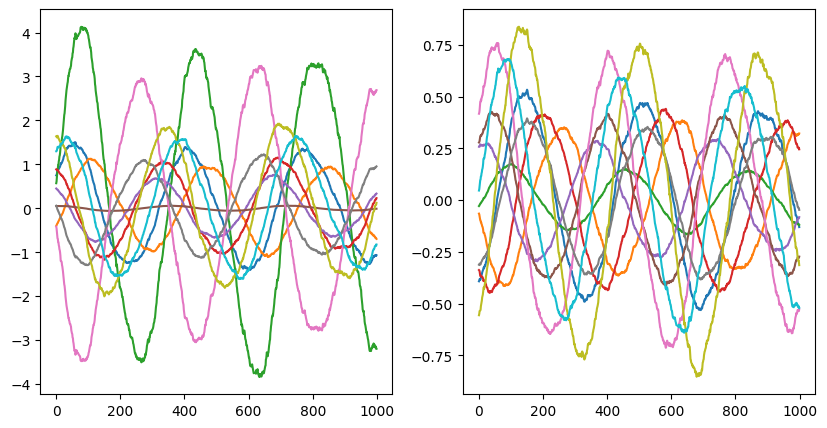

In [34]:
fig, ax = plt.subplots(1, 2, figsize=(10, 5))
for i in range(10):
    ax[0].plot(np.arange(1000), data_transform[0, i, :])
    
for i in range(10):
    ax[1].plot(np.arange(1000), data[0, i, :])

In [35]:
print(data_transform.shape)
print(data.shape)

(6, 10, 1000)
(6, 10, 1000)


In [36]:
data_t_cat_0 = data_transform[0, :2, :].T
original_data_0 = data[0, :, :].T

print(data_t_cat_0.shape)
print(original_data_0.shape)

(1000, 2)
(1000, 10)


In [37]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)

recovered_2d = pca.fit_transform(data_t_cat_0).T


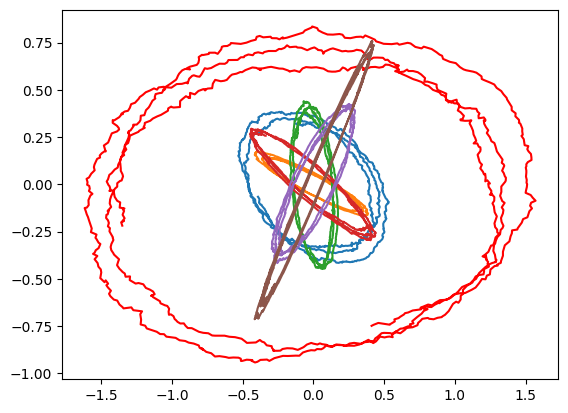

In [38]:
plt.plot(recovered_2d[0], recovered_2d[1], 'r')
for i in range(6):
    plt.plot(data[0, i, :], data[0, i+1, :])


In [39]:
print(np.linalg.matrix_rank(data[0, :, :]))
print(np.linalg.matrix_rank(data_transform[0, :, :]))

2
2


In [40]:
data[0, :, :].shape
# (10, 1000)

(10, 1000)

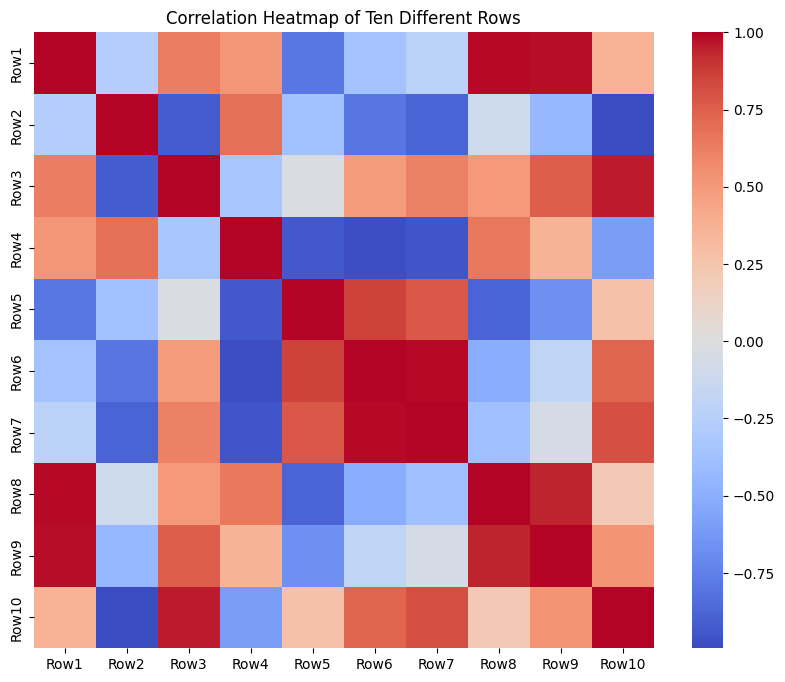

In [41]:
row1 = data[0, 0, :]
row2 = data[0, 1, :]
row3 = data[0, 2, :]
row4 = data[0, 3, :]
row5 = data[0, 4, :]
row6 = data[0, 5, :]
row7 = data[0, 6, :]
row8 = data[0, 7, :]
row9 = data[0, 8, :]
row10 = data[0, 9, :]

# Combine the rows into a DataFrame
combined_data = pd.DataFrame({
    'Row1': row1,
    'Row2': row2,
    'Row3': row3,
    'Row4': row4,
    'Row5': row5,
    'Row6': row6,
    'Row7': row7,
    'Row8': row8,
    'Row9': row9,
    'Row10': row10
})

# Compute the correlation matrix
correlation_matrix = combined_data.corr()

# Create a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, cmap='coolwarm', cbar=True)
plt.title('Correlation Heatmap of Ten Different Rows')
plt.show()

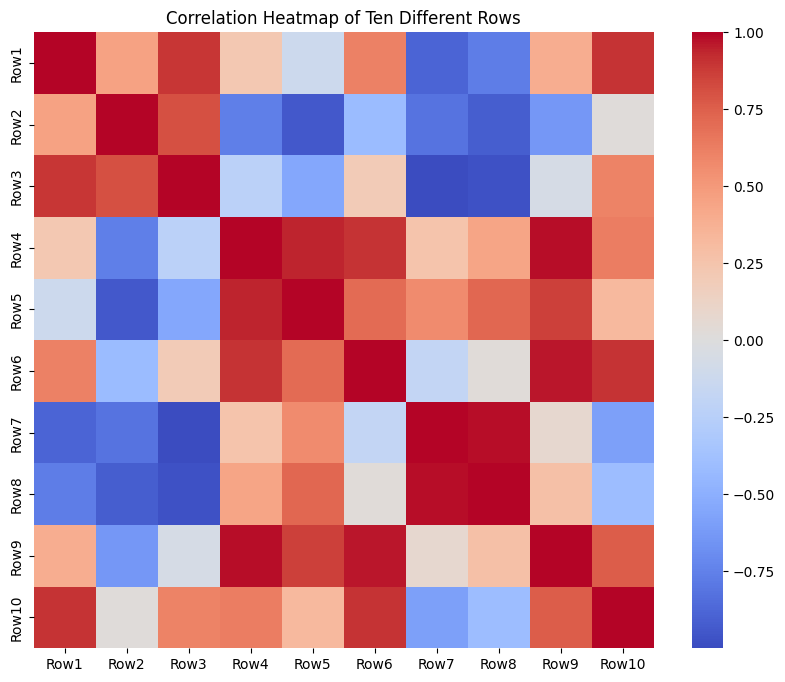

In [42]:
row1 = data_transform[0, 0, :]
row2 = data_transform[0, 1, :]
row3 = data_transform[0, 2, :]
row4 = data_transform[0, 3, :]
row5 = data_transform[0, 4, :]
row6 = data_transform[0, 5, :]
row7 = data_transform[0, 6, :]
row8 = data_transform[0, 7, :]
row9 = data_transform[0, 8, :]
row10 = data_transform[0, 9, :]

# Combine the rows into a DataFrame
combined_data = pd.DataFrame({
    'Row1': row1,
    'Row2': row2,
    'Row3': row3,
    'Row4': row4,
    'Row5': row5,
    'Row6': row6,
    'Row7': row7,
    'Row8': row8,
    'Row9': row9,
    'Row10': row10
})

# Compute the correlation matrix
correlation_matrix = combined_data.corr()

# Create a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=False, cmap='coolwarm', cbar=True)
plt.title('Correlation Heatmap of Ten Different Rows')
plt.show()